In [1]:
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from simulated_annealing.optimize import SimulatedAnneal
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from genetic_algorithm import genetic_algorithm
from tqdm import tqdm
import pso_simple

from copy import deepcopy
# from abc import ABC
from objective_function import SumOfSquaredErrors
from artificial_bee import ArtificialBee
from employee_bee import EmployeeBee
from onlooker_bee import OnLookerBee
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

from metaheuristics.bat import BatAlgorithm
from metaheuristics.bees import BeesAlgorithm
from metaheuristics.firefly import FireflyAlgorithm
from sklearn.decomposition import PCA
from timeit import default_timer as timer

#### Global variables

In [2]:
# start = timer()
res_sa = []
res_abc = []
res_bees = []
res_bats = []
res_firefly = []

acc_sa = 0.0
acc_abc = 0.0
acc_bees = 0.0
acc_bats = 0.0
acc_firefly = 0.0
end_point = 150

In [3]:
# ##remove this later
# import random
# for i in range(150):
#     res_firefly.append(random.randint(0,2))
# print(res_firefly)
# acc_firefly = 0.50

### Simulated annealing

In [4]:
def simulated_annealing(end_point):
    print("Simmulated Annealing called")
    # Load the Iris data set
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    X = X[:end_point]
    y = y[:end_point]
    print(len(X))
    # Split the data into test and train sets                         
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    # This is the hyperparameter space we'll be searching over
    svc_params = {'C':np.logspace(-8, 10, 19, base=2),
                  'fit_intercept':[True, False]
                 }

    # Using a linear SVM classifier             
    clf = svm.LinearSVC(max_iter = 1000, dual = False)
    # Initialize Simulated Annealing and fit
    sa = SimulatedAnneal(clf, svc_params, T=10.0, T_min=0.001, alpha=0.75,
                             verbose=True, max_iter=1000, n_trans=5, max_runtime=300,
                             cv=3, scoring='f1_macro', refit=True)
    sa.fit(X_train, y_train)

    # Print the best score and the best params
    # print("Score : ")
    # print(sa.best_score_, sa.best_params_)
    # Use the best estimator to predict classes
    optimized_clf = sa.best_estimator_
    y_test_pred = optimized_clf.predict(X_test)
    global res_sa 
    res_sa = optimized_clf.predict(X)
    global acc_sa 
    acc_sa = accuracy_score(y, res_sa)
#     print(res_sa)
#     print(acc_sa)
    # print(y_test_pred)
    print("Classification report : ")
    # Print a report of precision, recall, f1_score
    print(classification_report(y, res_sa))


    print("Sklearn metrics")
    result = {}
    result["Simmulated Annealing"] = accuracy_score(y, res_sa)
    print(accuracy_score(y, res_sa))

#     return result

In [5]:
start_sa = timer()
simulated_annealing(end_point)
end_sa = timer()

Simmulated Annealing called
150


INFO: Number of possible iterations given cooling schedule: 160

2 T: 10.00000, score: 0.952862, std: 0.033348, params: {'C': 4.0, 'fit_intercept': True}
3 T: 10.00000, score: 0.933627, std: 0.031799, params: {'C': 4.0, 'fit_intercept': False}
4 T: 10.00000, score: 0.952862, std: 0.033348, params: {'C': 4.0, 'fit_intercept': True}
5 T: 10.00000, score: 0.933627, std: 0.031799, params: {'C': 4.0, 'fit_intercept': False}
6 T: 10.00000, score: 0.952862, std: 0.033348, params: {'C': 4.0, 'fit_intercept': True}
7 T: 7.50000, score: 0.940137, std: 0.045474, params: {'C': 0.5, 'fit_intercept': True}
8 T: 7.50000, score: 0.952862, std: 0.033348, params: {'C': 64.0, 'fit_intercept': True}
9 T: 7.50000, score: 0.955269, std: 0.019600, params: {'C': 64.0, 'fit_intercept': False}
10 T: 7.50000, score: 0.933627, std: 0.031799, params: {'C': 4.0, 'fit_intercept': False}
11 T: 7.50000, score: 0.952862, std: 0.033348, params: {'C': 4.0, 'fit_intercept': True}
12 T: 5.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [6]:
print(start_sa-end_sa)

-0.18333789999999972


In [7]:
print(res_sa)
print(acc_sa)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.9466666666666667


### ABC

In [8]:
class ABC(object):

    def __init__(self, obj_function, colony_size=30, n_iter=5000, max_trials=100):
        self.colony_size = colony_size
        self.obj_function = obj_function

        self.n_iter = n_iter
        self.max_trials = max_trials

        self.optimal_solution = None
        self.optimality_tracking = []

    def __reset_algorithm(self):
        self.optimal_solution = None
        self.optimality_tracking = []

    def __update_optimality_tracking(self):
        self.optimality_tracking.append(self.optimal_solution.fitness)

    def __update_optimal_solution(self):
        n_optimal_solution = \
            min(self.onlokeer_bees + self.employee_bees,
                key=lambda bee: bee.fitness)
        if not self.optimal_solution:
            self.optimal_solution = deepcopy(n_optimal_solution)
        else:
            if n_optimal_solution.fitness < self.optimal_solution.fitness:
                self.optimal_solution = deepcopy(n_optimal_solution)

    def __initialize_employees(self):
        self.employee_bees = []
        #print(str(self.obj_function)+"********")
        for itr in range(self.colony_size // 2):
            self.employee_bees.append(EmployeeBee(self.obj_function))

    def __initialize_onlookers(self):
        self.onlokeer_bees = []
        for itr in range(self.colony_size // 2):
            self.onlokeer_bees.append(OnLookerBee(self.obj_function))

    def __employee_bees_phase(self):
        map(lambda bee: bee.explore(self.max_trials), self.employee_bees)

    def __calculate_probabilities(self):
        sum_fitness = sum(map(lambda bee: bee.get_fitness(), self.employee_bees))
        map(lambda bee: bee.compute_prob(sum_fitness), self.employee_bees)

    def __select_best_food_sources(self):
        self.best_food_sources =\
            filter(lambda bee: bee.prob > np.random.uniform(low=0, high=1),
                   self.employee_bees)
        while not self.best_food_sources:
            self.best_food_sources = \
                filter(lambda bee: bee.prob > np.random.uniform(low=0, high=1),
                       self.employee_bees)

    def __onlooker_bees_phase(self):
        map(lambda bee: bee.onlook(self.best_food_sources, self.max_trials),
            self.onlokeer_bees)

    def __scout_bees_phase(self):
        map(lambda bee: bee.reset_bee(self.max_trials),
            self.onlokeer_bees + self.employee_bees)

    def optimize(self):
        self.__reset_algorithm()
        self.__initialize_employees()
        self.__initialize_onlookers()
        for itr in range(self.n_iter):
            self.__employee_bees_phase()
            self.__update_optimal_solution()

            self.__calculate_probabilities()
            self.__select_best_food_sources()

            self.__onlooker_bees_phase()
            self.__scout_bees_phase()

            self.__update_optimal_solution()
            self.__update_optimality_tracking()
            # print("iter: {} = cost: {}"
            #       .format(itr, "%04.03e" % self.optimal_solution.fitness))

def decode_centroids(centroids, n_clusters, data):
    return centroids.reshape(n_clusters, data.shape[1])
  

def assign_centroid(centroids, point):
    distances = [np.linalg.norm(point - centroids[idx]) for idx in centroids]
    return np.argmin(distances)

def abc(end_point):
    data = MinMaxScaler().fit_transform(load_iris()['data'][:, [1,3]])
#     plt.figure(figsize=(9,8))
#     plt.scatter(data[:,0], data[:,1], s=50, edgecolor='w', alpha=0.5)
#     plt.title('Original Data')
#     plt.show()
    data = data[:end_point]
    colors = ['r', 'g', 'y']
    target = load_iris()['target']
    target = target[:end_point]
    plt.figure(figsize=(9,8))
#     print(target)
    for instance, tgt in zip(data, target):
        plt.scatter(instance[0], instance[1], s=50,
                    edgecolor='w', alpha=0.5, color=colors[tgt])
    plt.title('Original Groups')
    plt.show()

    objective_function = SumOfSquaredErrors(dim=6, n_clusters=3, data=data)
    optimizer = ABC(obj_function=objective_function, colony_size=30,
                    n_iter=300, max_trials=100)
    optimizer.optimize()

    centroids = dict(enumerate(decode_centroids(optimizer.optimal_solution.pos,
                                            n_clusters=3, data=data)))

    custom_tgt = []
    for instance in data:
        custom_tgt.append(assign_centroid(centroids, instance))
#     print("Custom Target: ")
#     print(len(custom_tgt))
#     print(custom_tgt)
    y_data = []
    for i in target:
        y_data.append(i)
    
    global res_abc
    res_abc = custom_tgt
    
    result = {}
    result["ABC"] = accuracy_score(y_data, custom_tgt)
    
    global acc_abc
    acc_abc = accuracy_score(y_data, custom_tgt)
#     return result
    colors = ['r', 'g', 'y']
    plt.figure(figsize=(9,8))
    for instance, tgt in zip(data, custom_tgt):
        plt.scatter(instance[0], instance[1], s=50, edgecolor='w',
                    alpha=0.5, color=colors[tgt])

    for centroid in centroids:
        plt.scatter(centroids[centroid][0], centroids[centroid][1],
                    color='k', marker='x', lw=5, s=500)
    plt.title('Partitioned Data found by ABC')
    plt.show()


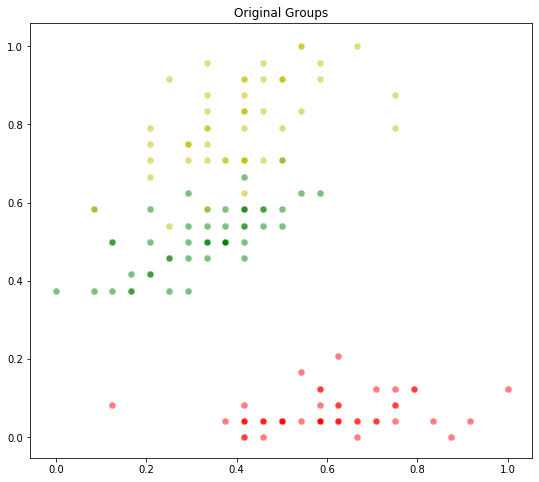

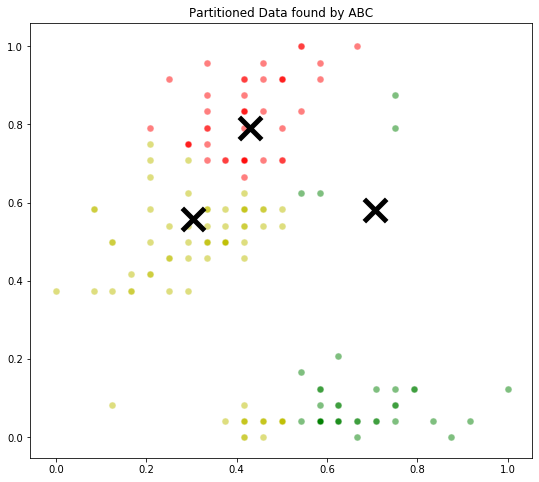

In [9]:
start_abc = timer()
abc(end_point)
end_abc = timer()

In [10]:
print(end_abc - start_abc)
print(res_abc)
print(acc_abc)

1.1633853999999997
[1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
0.06666666666666667


#### Helper functions for bees_bats_firefly

In [11]:
def create_cluster_loss(X, k):
    def cluster_loss(x):
        centers = np.split(x, k)
        dists = np.zeros((len(centers), len(X)))
        for i in range(len(centers)):
            dists[i] = np.sqrt(np.sum(np.square(X-centers[i]), axis=1))
        return np.sum(np.min(dists, axis=0))
    
    return cluster_loss


def plot_clustered_data(X, centers):
    dists = np.zeros((len(centers), len(X)))
    for i in range(len(centers)):
        dists[i] = np.sqrt(np.sum(np.square(X-centers[i]), axis=1))
    respons = np.argmin(dists, axis=0)
    if X.shape[1] > 2:
        pca = PCA(2).fit_transform(np.concatenate([X, centers], axis=0))
        
    X = pca[:-len(centers)]
    centers = pca[-len(centers):]
    
    centroids = dict(enumerate(centers))
    final_res = []
    # print(len(X))
    # print(X)
    # print(len(centroids))
    # print(centroids)
    for point in X:
        distances = [np.linalg.norm(point - centroids[idx]) for idx in centroids]
        final_res.append(np.argmin(distances))

#     print("Printing from algo")
#     print(final_res)
    
    plt.title('clustered data points')
    plt.scatter(X.T[0], X.T[1], c=respons)
    centers = np.array(centers)
    plt.scatter(centers.T[0], centers.T[1], c='black', marker='X')
    plt.show()
    return final_res

In [12]:

iris_data = load_iris()['data']
iris_data = iris_data[:end_point]
iris_labels = load_iris()['target']
iris_labels = iris_labels[:end_point]
# plt.title('ground truth iris data set')
iris_data_pca = PCA(2).fit_transform(iris_data)
# plt.scatter(iris_data_pca.T[0], iris_data_pca.T[1], c=iris_labels)
# plt.show()

true_centers = np.array([np.mean(iris_data[np.where(iris_labels == label)], axis=(0)) for label in set(iris_labels)])
# plot_clustered_data(iris_data, true_centers)

objective = 'min'
n = iris_data.shape[0]
k = 3
d_iris = iris_data.shape[1] * k # we concatenate all k cluster centers to one vector, i.e. k times 4 dimensions in iris data set
range_min  = -5.0
range_max = 5.0
T = 200

iris_loss = create_cluster_loss(iris_data, k=k)
iris_loss(true_centers)

bees = BeesAlgorithm(d=d_iris, n=n, range_min=range_min, range_max=range_max,
                     nb=50, ne=20, nrb=5, nre=10, shrink_factor=0.8, stgn_lim=5)

bat = BatAlgorithm(d=d_iris, n=n, range_min=range_min, range_max=range_max,
                   a=0.5, r_max=0.5, alpha=0.9, gamma=0.9, f_min=0.0, f_max=3.0)

firefly = FireflyAlgorithm(d=d_iris, n=n, range_min=range_min, range_max=range_max,
                           alpha=1.0, beta_max=1.0, gamma=0.5)

bees {'d': 12, 'n': 150, 'range_min': -5.0, 'range_max': 5.0, 'nb': 50, 'ne': 20, 'nrb': 5, 'nre': 10, 'shrink_factor': 0.8, 'stgn_lim': 5}
bat {'d': 12, 'n': 150, 'range_min': -5.0, 'range_max': 5.0, 'a': 0.5, 'r_max': 0.5, 'alpha': 0.9, 'gamma': 0.9, 'f_min': 0.0, 'f_max': 3.0}
firefly {'d': 12, 'n': 150, 'range_min': -5.0, 'range_max': 5.0, 'alpha': 1.0, 'beta_max': 1.0, 'gamma': 0.5}


### Bee Algorithm

Bee Algorithm
325.78103968552676
<class 'numpy.float64'>


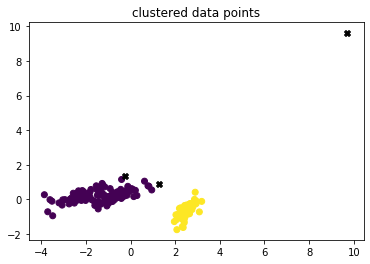

21.825456799999998
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.3


In [13]:
print("Bee Algorithm")

start_bee = timer()

solution_iris, latency_iris = bees.search(objective, iris_loss, T)
solution_iris_x, solution_iris_y = solution_iris
# solution_iris_x = solution_iris_x[:end_point]
print(solution_iris_y)
print(type(solution_iris_y))
# solution_iris_y = solution_iris_y[:end_point]
#bees.plot_history()

centers_iris = np.split(solution_iris_x, k)
# print(centers_iris)
global res_bees
res_bees = plot_clustered_data(iris_data, centers_iris)
global acc_bees
acc_bees = accuracy_score(iris_labels, res_bees)

end_bee = timer()

print(end_bee - start_bee)
print(res_bees)
print(acc_bees)

### Bat Algorithm

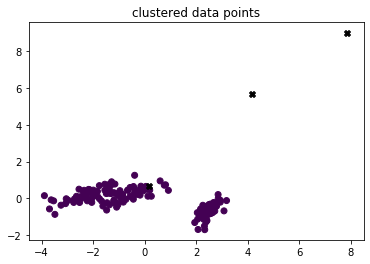

12.2358288
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
0.3333333333333333


In [14]:
start_bat = timer()
solution_iris, latency_iris = bat.search(objective, iris_loss, T)
solution_iris_x, solution_iris_y = solution_iris
# solution_iris_x = solution_iris_x[:end_point]
# solution_iris_y = solution_iris_y[:end_point]
# print(solution_iris)
# print(latency_iris)
#bat.plot_history()

centers_iris = np.split(solution_iris_x, k)
global res_bats
res_bats = plot_clustered_data(iris_data, centers_iris)
global acc_bats
acc_bats = accuracy_score(iris_labels, res_bats)

end_bat = timer()

print(end_bat-start_bat)
print(res_bats)
print(acc_bats)

### Firefly 

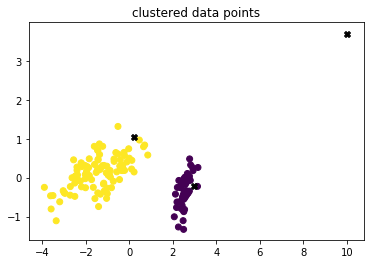

1118.3097817
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.3333333333333333


In [15]:
start_ff = timer()
solution_iris, latency_iris = firefly.search(objective, iris_loss, T)
solution_iris_x, solution_iris_y = solution_iris
# solution_iris_x = solution_iris_x[:end_point]
# solution_iris_y = solution_iris_y[:end_point]
# print(solution_iris)
# print(latency_iris)
#firefly.plot_history()

centers_iris = np.split(solution_iris_x, k)
global res_firefly
res_firefly = plot_clustered_data(iris_data, centers_iris)
global acc_firefly
acc_firefly = accuracy_score(iris_labels, res_bats)

end_ff = timer()

print(end_ff - start_ff)
print(res_firefly)
print(acc_firefly)

In [16]:
print(res_sa)
print(res_abc)
print(res_bees)
print(res_bats)
print(res_firefly)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,

In [17]:
print(acc_sa)
print(acc_abc)
print(acc_bees)
print(acc_bats)
print(acc_firefly)

accuracy = []

accuracy.append(acc_sa)
accuracy.append(acc_abc)
accuracy.append(acc_bees)
accuracy.append(acc_bats)
accuracy.append(acc_firefly)

0.9466666666666667
0.06666666666666667
0.3
0.3333333333333333
0.3333333333333333


### Hybridization (normal)

In [18]:
def hybridise(v1,v2,v3,v4,v5,count=5):
    count0=0
    count1=0
    count2=0
    unified=[]
    unified.append(v1)
    unified.append(v2)
    unified.append(v3)
    unified.append(v4)    
    unified.append(v5)
    v=[]
    for i in range (len(v1)):
        count0=0
        count1=0
        count2=0
        for j in range(len(unified)):
            if unified[j][i]==0:
                count0=count0+1
            elif unified[j][i]==1:
                count1=count1+1
            elif unified[j][i]==2:
                count2=count2+1
#         print (count0,end=",")
#         print(count1,end=",")
#         print(count2,end=",")
#         print(end="\n")
        if count0>=count1 and count0>=count2:
            v.append(0)
        elif count1>=count0 and count1>=count2:
            v.append(1)
        else:
            v.append(2)
#     for i in range(len(v)):
#         print (v[i],end=",")
    return v

In [19]:
start_hn = timer()
hybridize_normal = hybridise(res_sa,res_abc,res_bats,res_bees,res_firefly)
print(hybridize_normal)
print(accuracy_score(iris_labels, hybridize_normal))
end_hn = timer()

print(end_hn-start_hn)

[0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]
0.5333333333333333
0.0017076999999972031


### Hybridization (weighted)

In [20]:
def hybridiseWeight(v1,v2,v3,v4,accuracy,count=5):
    count0=0
    count1=0
    count2=0
    dsum=0
    for i in range(count):
        dsum=dsum+accuracy[i]
    weights=[]
    sum2=0
    for i in range(count):
        weights.append(accuracy[i]/dsum)
        sum2=sum2+weights[i]
#         print (weights[i],end=",")
#     print(sum2,end="\n")
    unified=[]
    unified.append(v1)
    unified.append(v2)
    unified.append(v3)
    unified.append(v4)    
#     unified.append(v5)
    v=[]
    for i in range (len(v1)):
        count0=0
        count1=0
        count2=0
        for j in range(len(unified)):
            if unified[j][i]==0:
                count0=count0+weights[j]
            elif unified[j][i]==1:
                count1=count1+weights[j]
            elif unified[j][i]==2:
                count2=count2+weights[j]
#         print (count0,end=",")
#         print(count1,end=",")
#         print(count2,end=",")
#         print(end="\n")
        if count0>=count1 and count0>=count2:
            v.append(0)
        elif count1>=count0 and count1>=count2:
            v.append(1)
        else:
            v.append(2)
#     print(len(v))
    return v

In [21]:
start_hw = timer()
hybridize_weighted = hybridiseWeight(res_sa,res_abc,res_bats,res_bees, accuracy)
print(hybridize_weighted)
print(accuracy_score(iris_labels, hybridize_weighted))
end_hw = timer()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
0.9466666666666667


In [22]:
print(end_hw - start_hw)

0.0032678000000032625


In [24]:
import pandas as pd
df = pd.read_csv('bench.csv')

In [46]:
df.head(10)

,Algo,data_points,accuracy,time_taken
0,sa,100,1.0000,0.2025
1,abc,100,0.7900,0.9116
2,bee,100,0.5000,71.4607
3,bats,100,0.5000,21.9260
4,ff,100,0.5000,1218.9624
5,hn,100,1.0000,71.5020
6,hw,100,1.0000,71.5020
7,sa,110,0.9909,0.7128
8,abc,110,0.8909,2.9367
9,bee,110,0.0909,69.7619


In [30]:
x = [100,110,120,130,140,150]

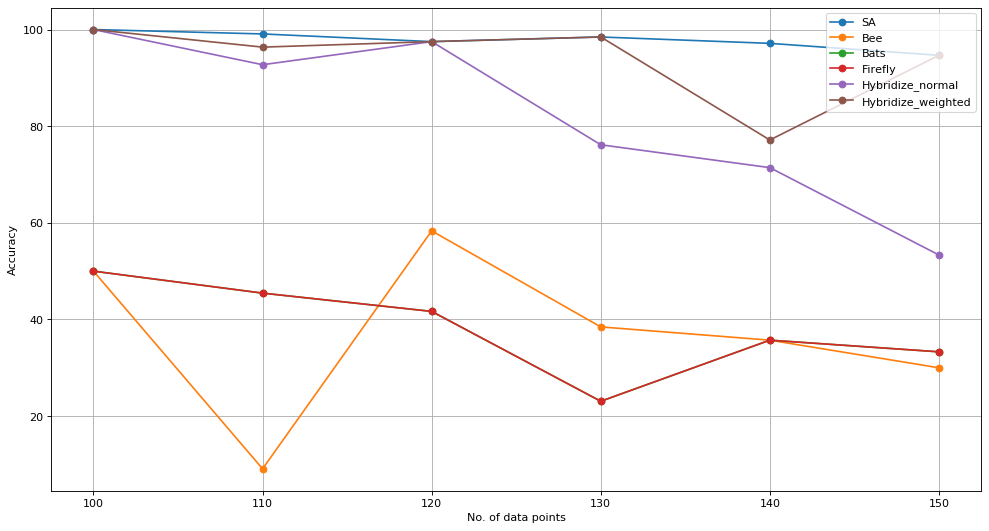

In [40]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
df_temp = df.loc[df['Algo']=='sa']

y1 = df.loc[df['Algo']=='sa']['accuracy']*100
y2 = df.loc[df['Algo']=='abc']['accuracy']*100
y3 = df.loc[df['Algo']=='bee']['accuracy']*100
y4 = df.loc[df['Algo']=='bats']['accuracy']*100
y5 = df.loc[df['Algo']=='ff']['accuracy']*100
y6 = df.loc[df['Algo']=='hn']['accuracy']*100
y7 = df.loc[df['Algo']=='hw']['accuracy']*100

plt.plot(x,y1,marker='o',label='SA')
# plt.plot(x,y2,marker='o',label='ABC')
plt.plot(x,y3,marker='o',label='Bee')
plt.plot(x,y4,marker='o',label='Bats')
plt.plot(x,y5,marker='o',label='Firefly')
plt.plot(x,y6,marker='o',label='Hybridize_normal')
plt.plot(x,y7,marker='o',label='Hybridize_weighted')

plt.xlabel("No. of data points")
plt.ylabel("Accuracy")

plt.legend(loc = 'upper right')
plt.grid()
_=plt.show()

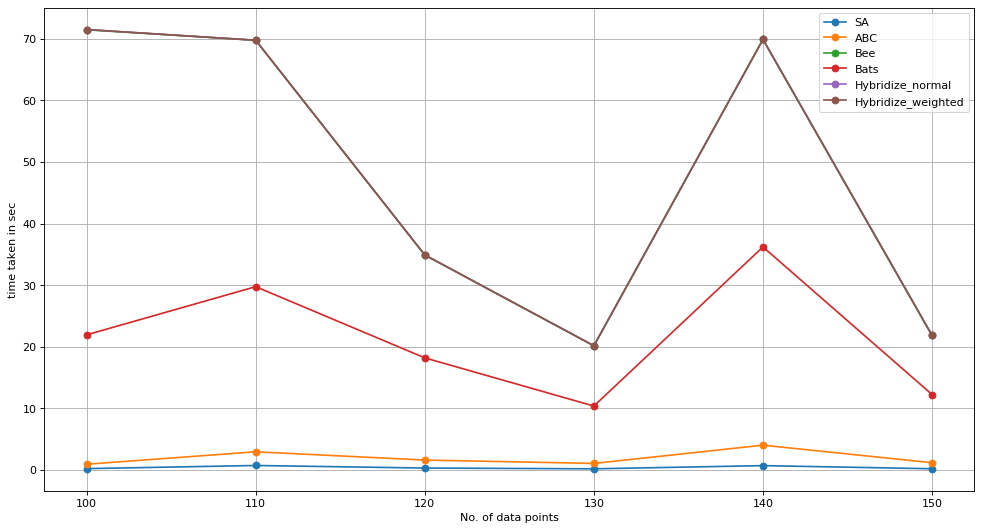

In [45]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
df_temp = df.loc[df['Algo']=='sa']

y1 = df.loc[df['Algo']=='sa']['time_taken']
y2 = df.loc[df['Algo']=='abc']['time_taken']
y3 = df.loc[df['Algo']=='bee']['time_taken']
y4 = df.loc[df['Algo']=='bats']['time_taken']
y5 = df.loc[df['Algo']=='ff']['time_taken']
y6 = df.loc[df['Algo']=='hn']['time_taken']
y7 = df.loc[df['Algo']=='hw']['time_taken']

plt.plot(x,y1,marker='o',label='SA')
plt.plot(x,y2,marker='o',label='ABC')
plt.plot(x,y3,marker='o',label='Bee')
plt.plot(x,y4,marker='o',label='Bats')
# plt.plot(x,y5,marker='o',label='Firefly')
plt.plot(x,y6,marker='o',label='Hybridize_normal')
plt.plot(x,y7,marker='o',label='Hybridize_weighted')

plt.xlabel("No. of data points")
plt.ylabel("time taken in sec")

plt.legend(loc = 'upper right')
plt.grid()
_=plt.show()